<a href="https://colab.research.google.com/github/heidaralavi/Gas-Prj/blob/main/Gas_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# گندله سازی اردکان
بررسی میزان مصرف گاز با برخی پارامترهای مهم

ابتدا توابع مورد نیاز را ایمپورت می کنیم

In [31]:
!pip install xgboost

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest,RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import scale , normalize, minmax_scale,RobustScaler,MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from google.colab import files


In [33]:
def Download_to_local_drive(File_Name):
  plt.savefig(File_Name)
  files.download(File_Name)

دریافت داده های اولیه

In [34]:
url = 'https://raw.githubusercontent.com/heidaralavi/Gas-Prj/main/total.csv'
df=pd.read_csv(url)
#df=pd.read_csv('input-data.csv')
df.head()

,Date,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
0,3/22/2019,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364
1,3/23/2019,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304
2,3/24/2019,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200
3,3/25/2019,8.850536,2028.555556,66.986667,21.990000,23.583333,12277.02,5.978728,129.616905,114.068555,102.256167,825.551090,924.538606,21.236601,1.720821,1.590273,31.493056,177.220492,179.281210,203772
4,3/26/2019,9.006061,2034.181818,67.096667,21.846667,19.883333,9942.13,4.718885,138.999936,115.877855,100.122762,724.071424,910.241250,18.896511,1.708230,1.278280,26.135069,163.096300,129.430960,200120


رسم ترند مصرف گاز

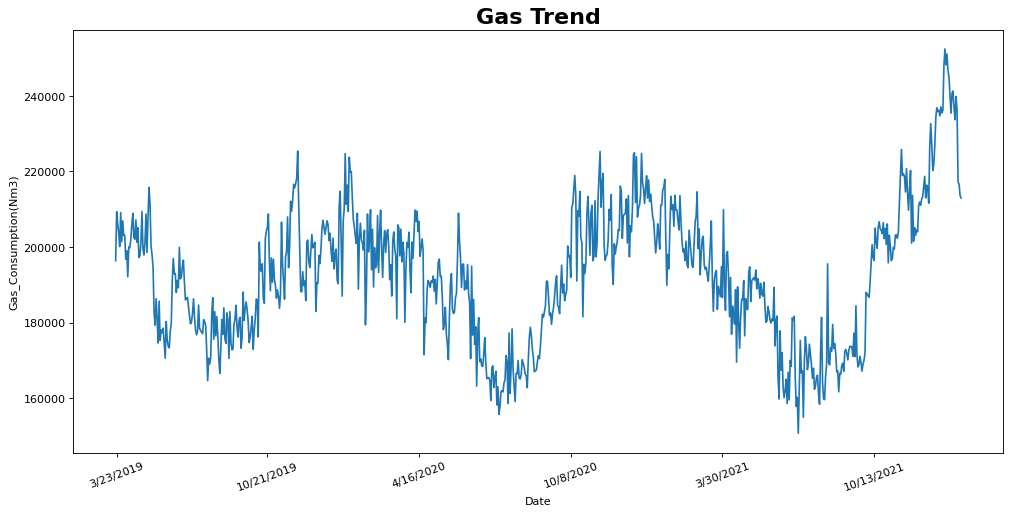

In [35]:
plt.figure(figsize=(15,7),dpi=80)
plt.xticks(ticks=[1,150,300,450,600,750,1000,1150],rotation=20)
plt.title('Gas Trend', fontsize=20,fontweight='bold')
sns.lineplot(x=df.iloc[:,0] , y=df.iloc[:,19], data=df )

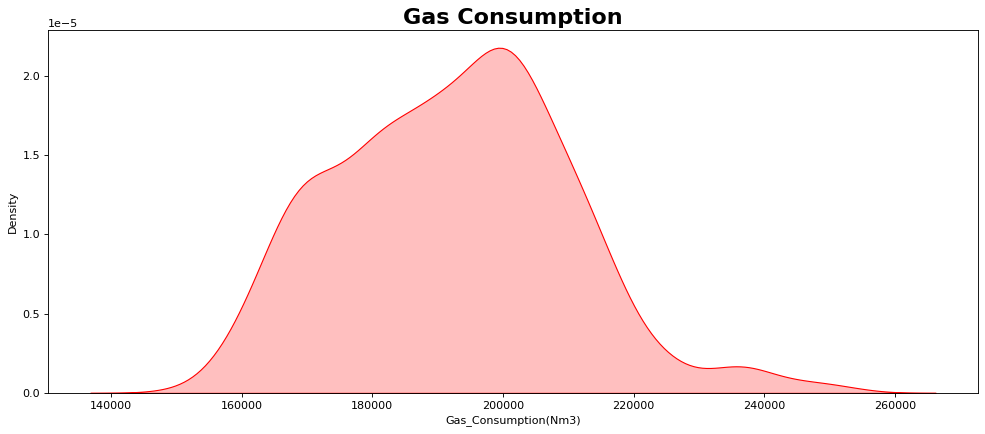

In [36]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Gas Consumption', fontsize=20,fontweight='bold')
sns.kdeplot(df.iloc[:,19], shade=True , color='r')
#Download to local drive
#File_Name='Gas_Consumption.jpg'
#Download_to_local_drive(File_Name)

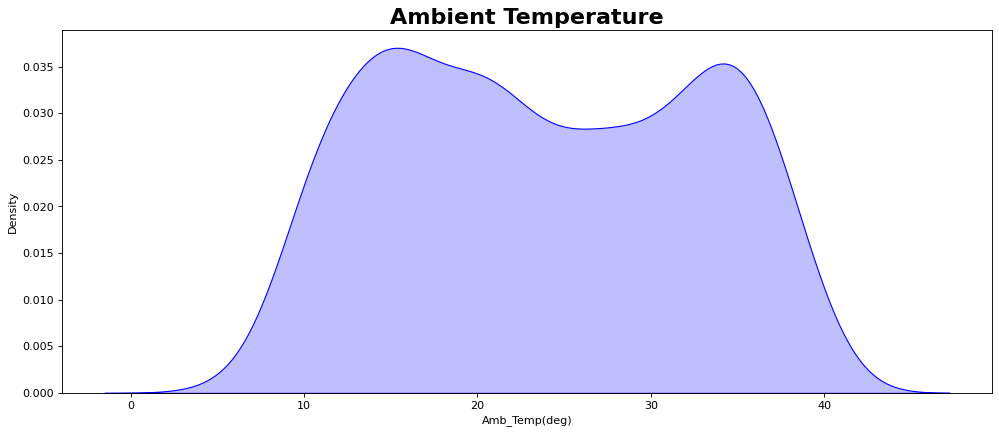

In [37]:
plt.figure(figsize=(15,6),dpi=80)
#plt.xticks(ticks=[0,190000,210000],rotation=0)
plt.title('Ambient Temperature', fontsize=20,fontweight='bold')
sns.kdeplot(df.iloc[:,13], shade=True , color='b')
#Download to local drive
#File_Name='Ambient_Temperature.jpg'
#Download_to_local_drive(File_Name)

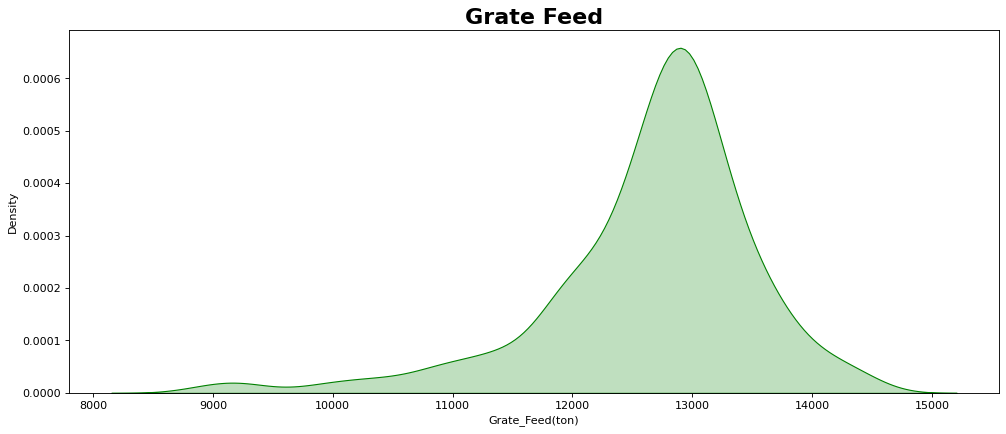

In [38]:
plt.figure(figsize=(15,6),dpi=80)
#plt.xticks(ticks=[0,190000,210000],rotation=0)
plt.title('Grate Feed', fontsize=20,fontweight='bold')
sns.kdeplot(df.iloc[:,6], shade=True , color='g')
#Download to local drive
#File_Name='Grate_Feed.jpg'
#Download_to_local_drive(File_Name)

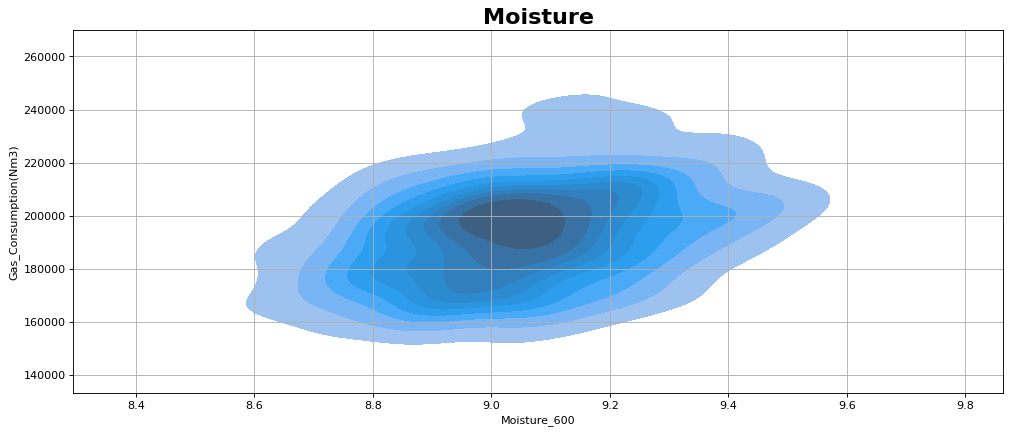

In [39]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Moisture', fontsize=20,fontweight='bold')
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,1] , y=df.iloc[:,19],fill=True, levels=10,)
#Download to local drive
#File_Name='Moisture.jpg'
#Download_to_local_drive(File_Name)

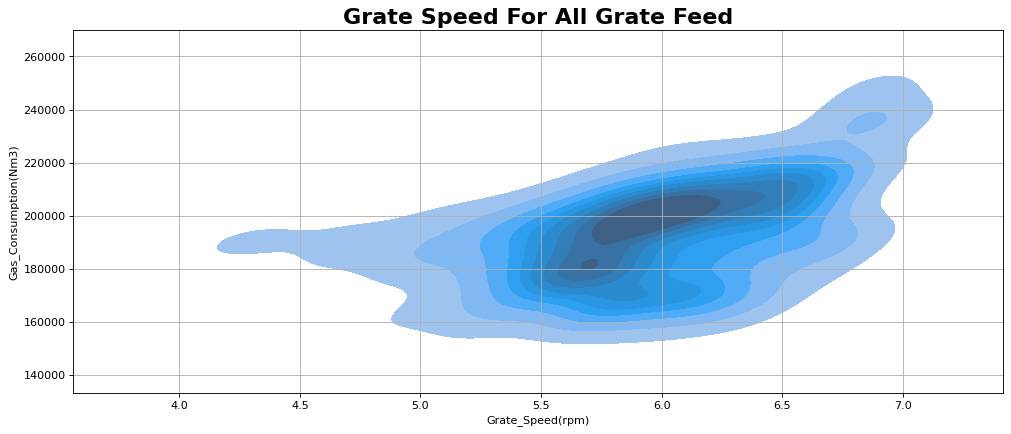

In [40]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Grate Speed For All Grate Feed', fontsize=20,fontweight='bold')
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,7] , y=df.iloc[:,19],fill=True, levels=10)
plt.show()
#Download to local drive
#File_Name='Grate_Speed.jpg'
#Download_to_local_drive(File_Name)

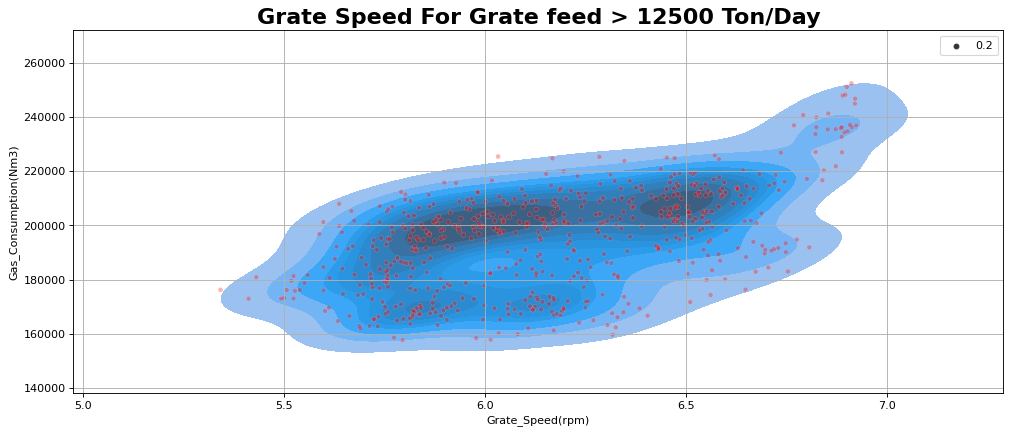

In [41]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Grate Speed For Grate feed > 12500 Ton/Day', fontsize=20,fontweight='bold')
plt.grid()
df12500=df[df['Grate_Feed(ton)'] >= 12500]
sns.kdeplot(data=df12500, x=df12500.iloc[:,7] , y=df12500.iloc[:,19],fill=True, levels=10)
sns.scatterplot(data=df12500, x=df12500.iloc[:,7] , y=df12500.iloc[:,19],color='red',size=0.2,alpha=0.3)
plt.show()
#Download to local drive
#File_Name='Grate_Speed.jpg'
#Download_to_local_drive(File_Name)

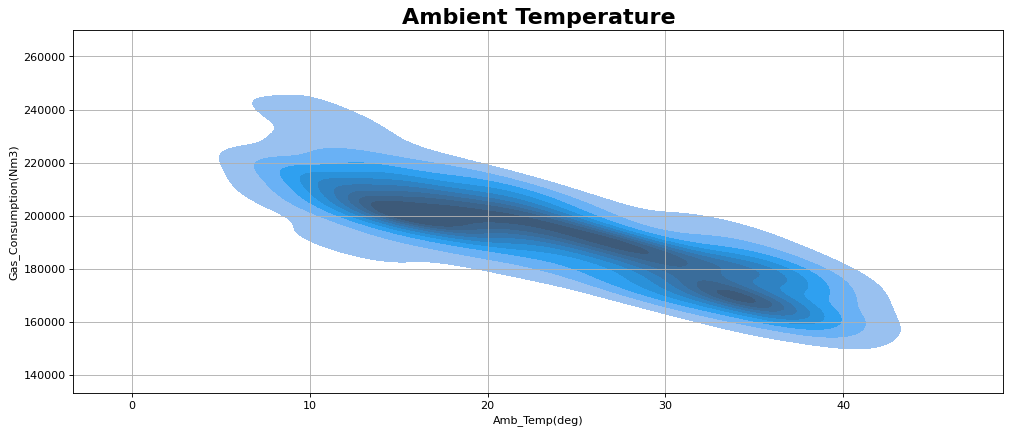

In [42]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Ambient Temperature', fontsize=20,fontweight='bold')
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,13] , y=df.iloc[:,19],fill=True, levels=10)
#Download to local drive
#File_Name='Ambient_Temperature2.jpg'
#Download_to_local_drive(File_Name)

حذف ستون اول

In [43]:
df=df.set_index('Date')
#df.drop(columns='Unnamed: 0',inplace=True)

In [44]:
df.describe()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,9.052616,1926.490713,67.282228,22.970166,23.626205,12652.807665,5.947006,149.006817,123.751223,104.266301,793.753616,1005.210255,23.786379,1.629352,1.644791,37.708302,183.925652,150.390299,192468.573477
std,0.186893,132.879014,0.447971,1.188788,0.966694,891.138948,0.503959,12.007751,12.741416,9.732978,44.950950,73.224603,8.908524,0.082423,0.135520,5.059865,11.887222,26.066274,17756.749138
min,8.476923,1547.444444,65.805000,19.260000,17.100000,8847.891000,4.054120,117.594789,100.831111,65.826530,546.915707,802.767262,5.423704,1.304804,1.142890,26.135069,130.982433,68.615551,150690.000000
25%,8.928571,1833.250000,66.966667,22.106667,23.850000,12327.370000,5.667813,138.791111,115.213712,99.924567,770.002227,974.931166,15.951052,1.550342,1.590273,34.957639,180.035448,133.285601,179520.000000
50%,9.048611,1917.307692,67.303333,22.980000,24.000000,12808.700000,5.955951,149.330140,120.658599,104.100535,798.513605,1027.858257,23.323067,1.652624,1.645528,36.514583,185.358079,151.328520,192904.000000
75%,9.184722,2013.909091,67.596667,23.863333,24.000000,13148.270000,6.296085,157.796101,129.936738,110.690601,828.743432,1055.042338,31.882634,1.699706,1.705885,37.793750,190.959221,168.023310,204330.000000
max,9.681429,2288.666667,68.330000,25.693333,24.000000,14510.030000,6.922985,186.652068,195.568567,127.353284,872.397282,1303.756288,40.288171,1.780731,1.944085,50.481944,199.896767,199.714990,252402.000000


نرمال سازی داده ها

In [45]:
col=df.columns
data=df.values
ind = df.index.values

In [46]:
trans = MinMaxScaler()
normal_data = trans.fit_transform(data)

In [49]:
normal_df=pd.DataFrame(normal_data,columns=col,index=ind)

In [50]:
normal_df.describe()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,0.477950,0.511380,0.585041,0.576710,0.945827,0.671993,0.659803,0.454869,0.241933,0.624765,0.758378,0.404087,0.526687,0.681928,0.626441,0.475348,0.768247,0.623761,0.410754
std,0.155161,0.179270,0.177414,0.184786,0.140101,0.157386,0.175665,0.173881,0.134492,0.158191,0.138106,0.146160,0.255519,0.173184,0.169147,0.207824,0.172493,0.198828,0.174579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374966,0.385587,0.460066,0.442487,0.978261,0.614517,0.562485,0.306938,0.151815,0.554199,0.685404,0.343648,0.301951,0.515915,0.558394,0.362370,0.711797,0.493290,0.283447
50%,0.474625,0.498991,0.593399,0.578238,1.000000,0.699525,0.662921,0.459551,0.209289,0.622071,0.773002,0.449293,0.513398,0.730826,0.627361,0.426318,0.789032,0.630918,0.415035
75%,0.587626,0.629318,0.709571,0.715544,1.000000,0.759497,0.781481,0.582144,0.307224,0.729180,0.865879,0.503554,0.758908,0.829753,0.702693,0.478857,0.870309,0.758262,0.527371
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# بررسی اولیه داده ها

دیتاها را نسبت به هم ترسیم می کنیم تا دیدی کلی از داده ها بدست آوریم

ماتریس ضریب همبستگی دیتاها را محاسبه و ترسیم می کنیم

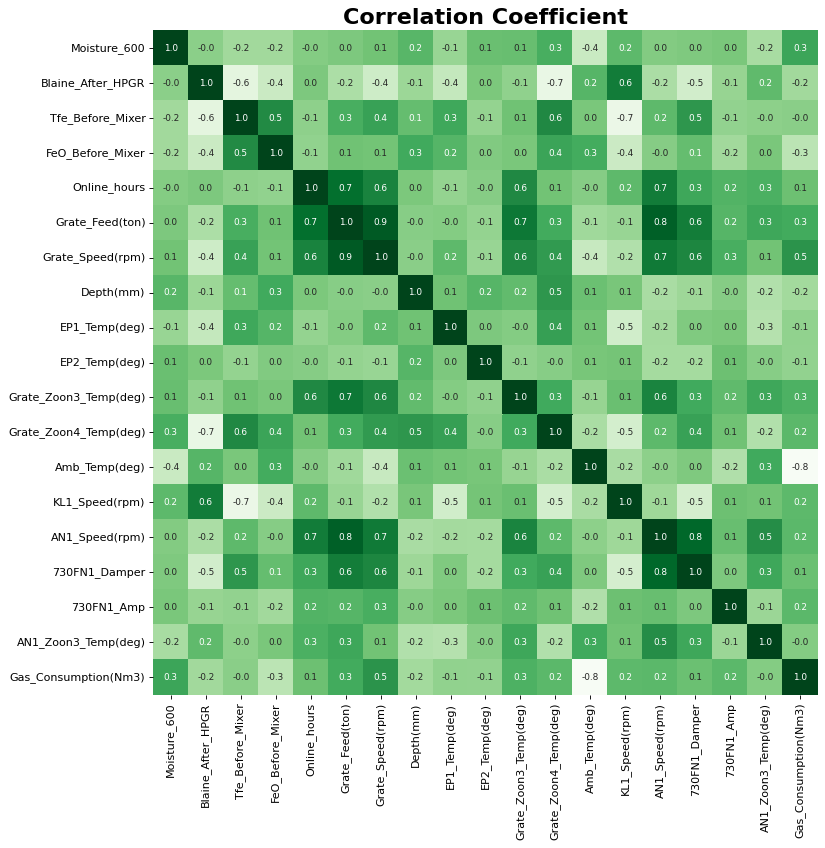

In [51]:
corr = normal_df.corr()
plt.figure(figsize=(15,11),dpi=80)
plt.title('Correlation Coefficient', fontsize=20,fontweight='bold')
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')
#Download to local drive
#File_Name='Correlation_Coefficient.jpg'
#Download_to_local_drive(File_Name)

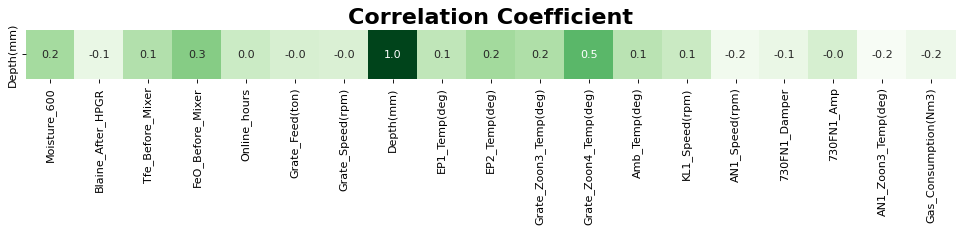

In [52]:
plt.figure(figsize=(15,11),dpi=80)
plt.title('Correlation Coefficient', fontsize=20,fontweight='bold')
sns.heatmap(corr.iloc[7:8,0:19], cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

بررسی اهمیت پاارامترهای ورودی روی مصرف گاز

In [53]:
# split into input and output elements
X, y = normal_data[:, :-1], normal_data[:, -1]

In [54]:
model = DecisionTreeRegressor(random_state=123)
model = model.fit(X,y)

(-1.0, 18.0)

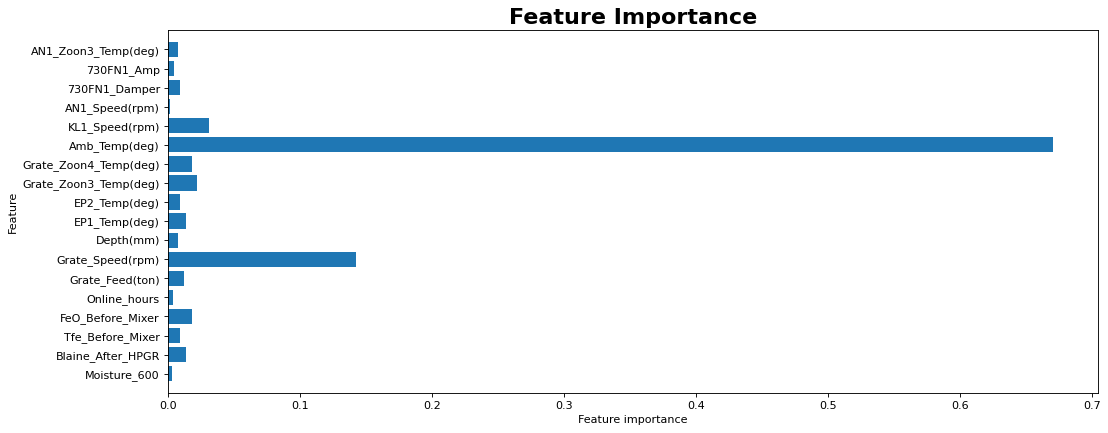

In [55]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Feature Importance', fontsize=20,fontweight='bold')
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
#Download to local drive
#File_Name='Feature_Importance.jpg'
#Download_to_local_drive(File_Name)

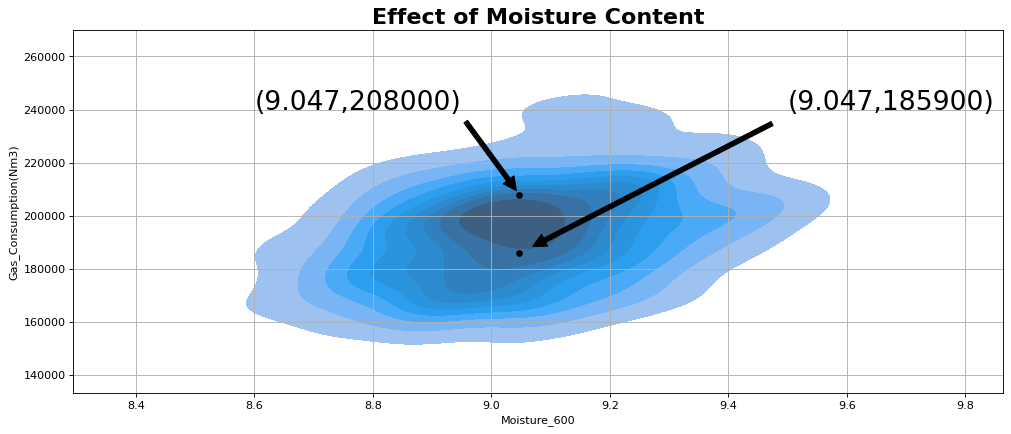

In [56]:
plt.figure(figsize=(15,6),dpi=80)
plt.grid()
plt.title('Effect of Moisture Content', fontsize=20,fontweight='bold')
plt.annotate('(9.047,185900)', xy=(9.047, 185900), xytext=(9.5, 240000),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=24)
plt.annotate('(9.047,208000)', xy=(9.047, 208000), xytext=(8.6, 240000),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=24)
plt.plot([9.047], [185900],marker=".",  markersize=10,color='black')
plt.plot([9.047], [208000],marker=".",  markersize=10,color='black') 
sns.kdeplot(data=df, x=df.iloc[:,0] , y=df.iloc[:,18],fill=True, levels=10,cbar=False)
#Download to local drive
#File_Name='Effect_of_Moisture_Content.jpg'
#Download_to_local_drive(File_Name)

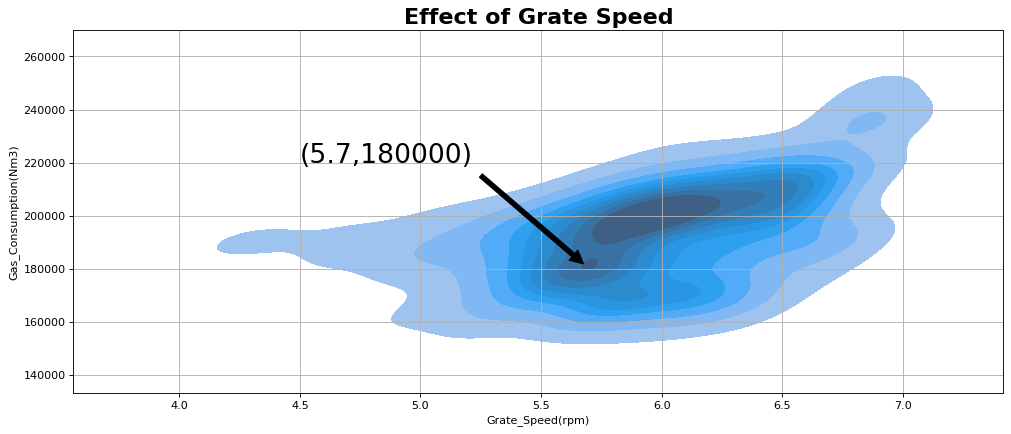

In [57]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Effect of Grate Speed', fontsize=20,fontweight='bold')
plt.annotate('(5.7,180000)', xy=(5.7, 180000), xytext=(4.5, 220000),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=24)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,6] , y=df.iloc[:,18],fill=True, levels=10)
#Download to local drive
#File_Name='Effect_of_Grate_Speed.jpg'
#Download_to_local_drive(File_Name)

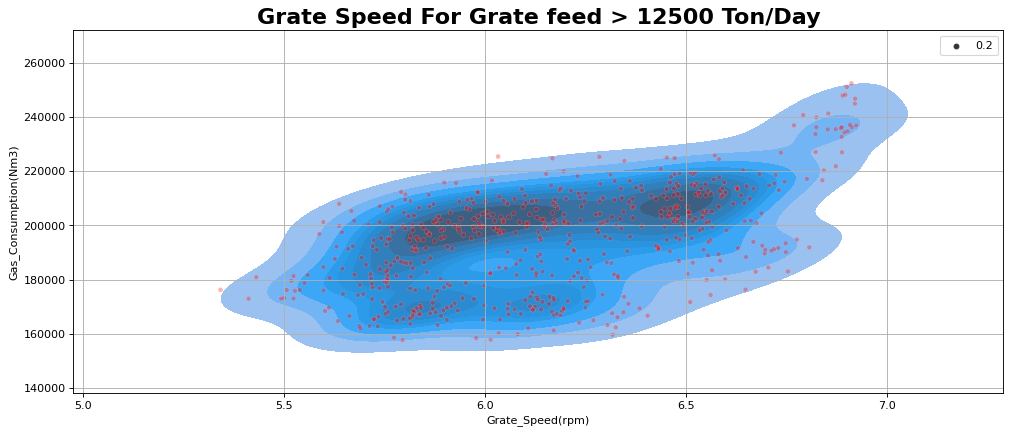

In [58]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Grate Speed For Grate feed > 12500 Ton/Day', fontsize=20,fontweight='bold')
plt.grid()
df12500=df[df['Grate_Feed(ton)'] >= 12500]
sns.kdeplot(data=df12500, x=df12500.iloc[:,6] , y=df12500.iloc[:,18],fill=True, levels=10)
sns.scatterplot(data=df12500, x=df12500.iloc[:,6] , y=df12500.iloc[:,18],color='red',size=0.2,alpha=0.3)
plt.show()
#Download to local drive
#File_Name='Grate_Speed.jpg'
#Download_to_local_drive(File_Name)

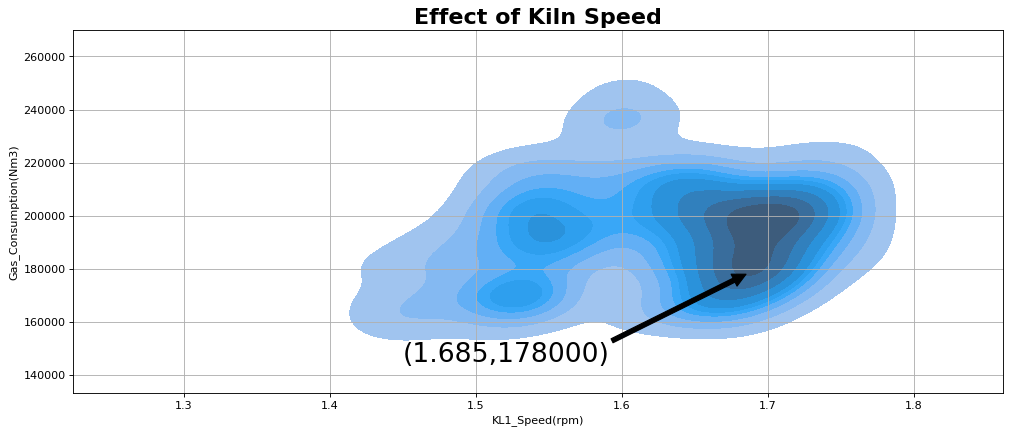

In [59]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Effect of Kiln Speed', fontsize=20,fontweight='bold')
plt.annotate('(1.685,178000)', xy=(1.685, 178000), xytext=(1.45, 145000),arrowprops=dict(facecolor='black', shrink=0),fontsize=24)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,13] , y=df.iloc[:,18],fill=True, levels=10)
#Download to local drive
#File_Name='Effect_of_Kiln_Speed.jpg'
#Download_to_local_drive(File_Name)

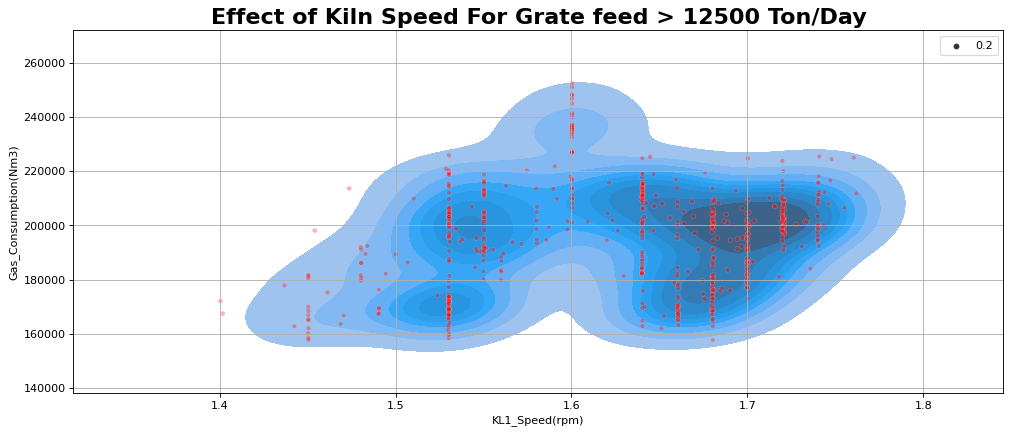

In [60]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Effect of Kiln Speed For Grate feed > 12500 Ton/Day', fontsize=20,fontweight='bold')
plt.grid()
df12500=df[df['Grate_Feed(ton)'] >= 12500]
sns.kdeplot(data=df12500, x=df12500.iloc[:,13] , y=df12500.iloc[:,18],fill=True, levels=10)
sns.scatterplot(data=df12500, x=df12500.iloc[:,13] , y=df12500.iloc[:,18],color='red',size=0.2,alpha=0.3)
plt.show()
#Download to local drive
#File_Name='Grate_Speed.jpg'
#Download_to_local_drive(File_Name)

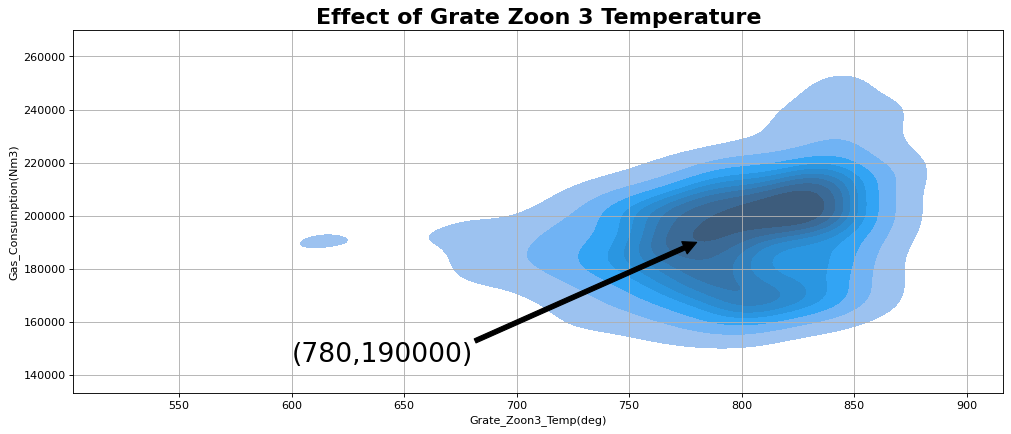

In [61]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Effect of Grate Zoon 3 Temperature', fontsize=20,fontweight='bold')
plt.annotate('(780,190000)', xy=(780, 190000), xytext=(600, 145000),arrowprops=dict(facecolor='black', shrink=0),fontsize=24)
plt.grid()
sns.kdeplot(data=df, x=df.iloc[:,10] , y=df.iloc[:,18],fill=True, levels=10)
#Download to local drive
#File_Name='Effect_of_Grate_Zoon 3_Temperature.jpg'
#Download_to_local_drive(File_Name)

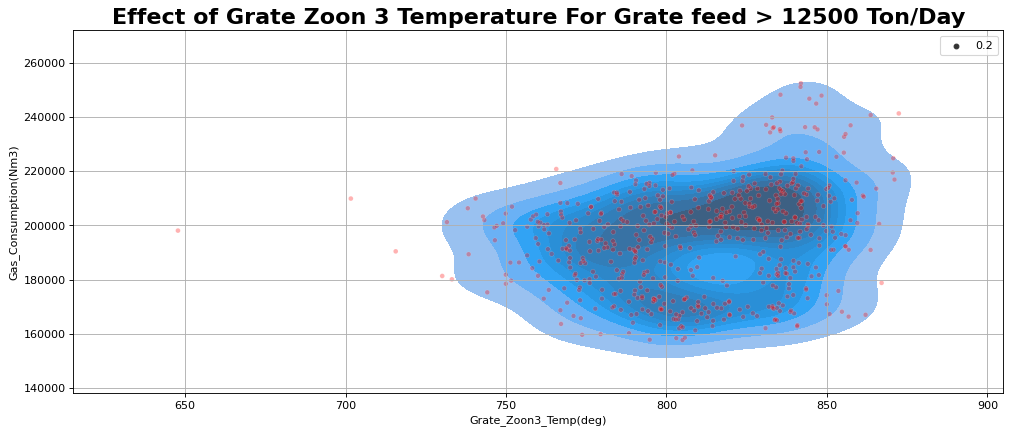

In [62]:
plt.figure(figsize=(15,6),dpi=80)
plt.title('Effect of Grate Zoon 3 Temperature For Grate feed > 12500 Ton/Day', fontsize=20,fontweight='bold')
plt.grid()
df12500=df[df['Grate_Feed(ton)'] >= 12500]
sns.kdeplot(data=df12500, x=df12500.iloc[:,10] , y=df12500.iloc[:,18],fill=True, levels=10)
sns.scatterplot(data=df12500, x=df12500.iloc[:,10] , y=df12500.iloc[:,18],color='red',size=0.2,alpha=0.3)
plt.show()
#Download to local drive
#File_Name='Grate_Speed.jpg'
#Download_to_local_drive(File_Name)

In [63]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_test.shape,X_train.shape)

(252, 18) (585, 18)


In [64]:
model = DecisionTreeRegressor(random_state=123)
model = model.fit(X_train,y_train)

In [65]:
print("Accuracy on test: {:.2f} %".format(model.score(X_test, y_test)*100))

Accuracy on test: 79.13 %


In [66]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 79.13%
Mean Absolute Error 0.06
Mean Squared Error 0.01


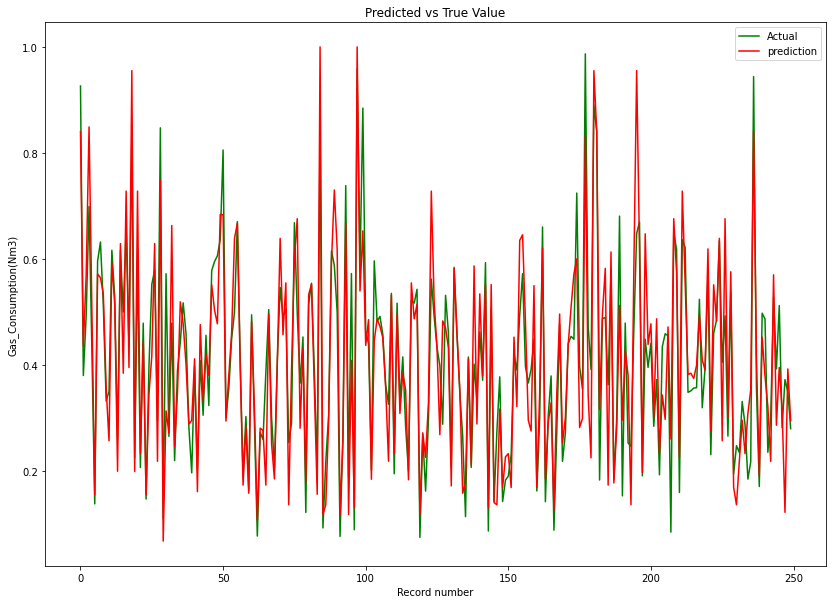

In [67]:
plt.figure(figsize=(14,10))
plt.plot(range(250),y_test[0:250], color = "green")
plt.plot(range(250),model.predict(X_test[0:250]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# استفاده از مدل رگرسیون خطی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [68]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

مدل چقدر خوب آموزش دیده است؟

In [69]:
ybar = model.predict(X_train)

In [70]:
# evaluate predictions
mae = mean_absolute_error(y_train, ybar)
print('MAE: %.3f' %mae)

MAE: 0.054


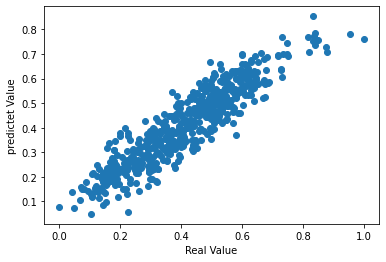

In [71]:
plt.scatter(y_train, ybar)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [72]:
print("The Train Score is ", (r2_score( y_train, ybar)))

The Train Score is  0.8403985649903571


مدل چقدر خوب حدس می زند؟

In [73]:
# evaluate the model
yhat = model.predict(X_test)

In [74]:
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' %mae)

MAE: 0.055


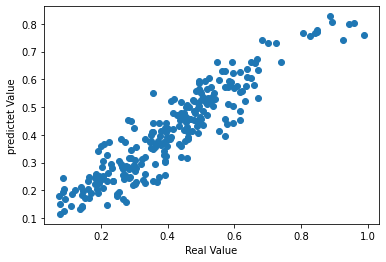

In [75]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [76]:
print("The Predict Score is ", (r2_score( y_test,yhat)))


The Predict Score is  0.8517888336558648


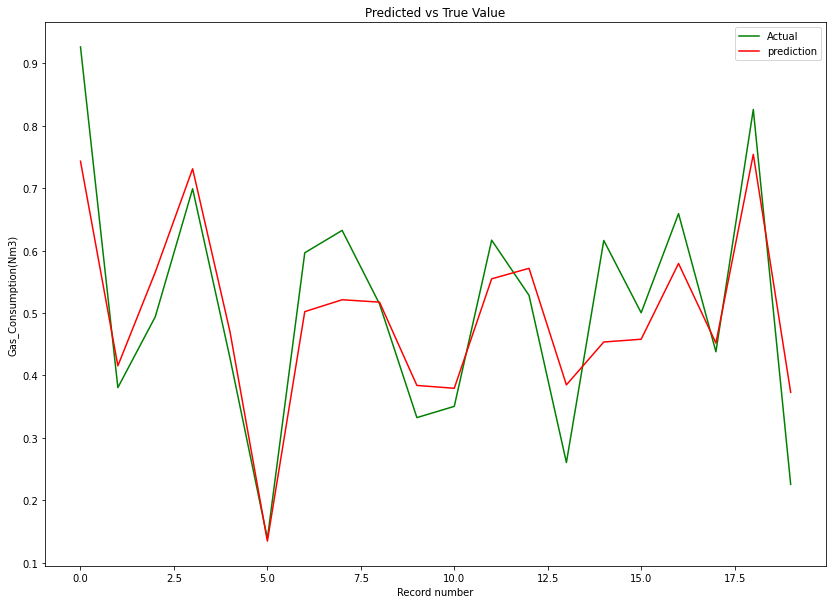

In [77]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# استفاده از شبکه عصبی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [78]:
model = MLPRegressor(hidden_layer_sizes=(100,),activation="relu" ,random_state=1, max_iter=200000)
model.fit(X_train, y_train)


MLPRegressor(max_iter=200000, random_state=1)

مدل چقدر خوب آموزش دیده است؟

In [79]:
ybar = model.predict(X_train)

In [80]:
# evaluate predictions
mae = mean_absolute_error(y_train, ybar)
print('MAE: %.3f' %mae)

MAE: 0.059


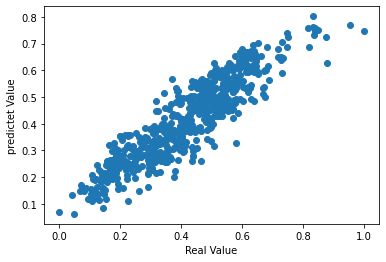

In [81]:
plt.scatter(y_train, ybar)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [ ]:
print("The Train Score is ", (r2_score( y_train, ybar)))

The Train Score is  0.8148780454421856


مدل چقدر خوب حدس می زند؟

In [ ]:
# evaluate the model
yhat = model.predict(X_test)

In [ ]:
print("The Train Score is: ", (r2_score( y_test,yhat)))

The Train Score is:  0.8024211761226439


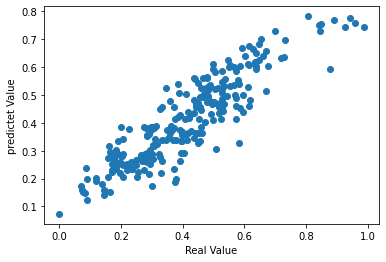

In [ ]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

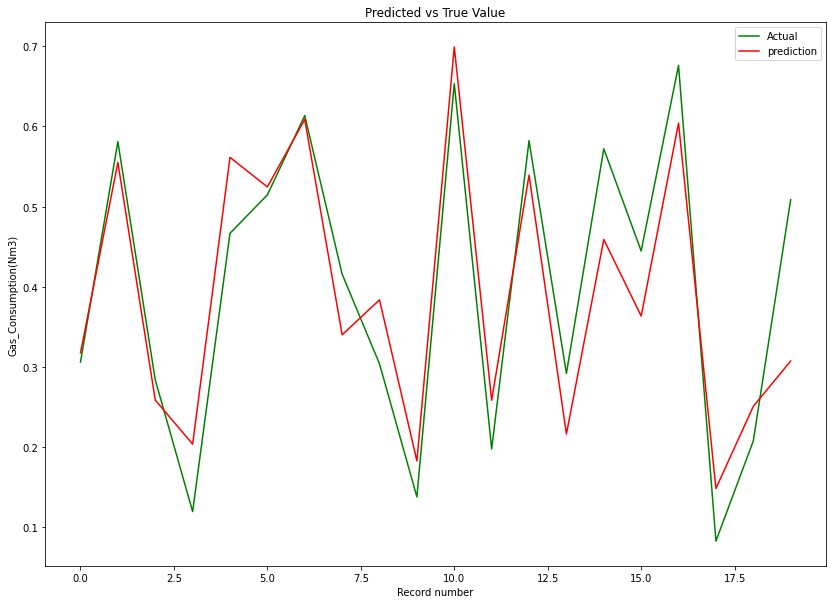

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Decision Tree Regression

In [ ]:
model = DecisionTreeRegressor(random_state=123)
model = model.fit(X_train,y_train)

In [ ]:
print("Accuracy on test: {:.2f} %".format(model.score(X_test, y_test)*100))

Accuracy on test: 77.84 %


In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 77.84%
Mean Absolute Error 0.06
Mean Squared Error 0.01


In [ ]:
model.feature_importances_

array([0.00477549, 0.0102768 , 0.01420866, 0.02064312, 0.00418099,
       0.00248641, 0.12589002, 0.00612958, 0.00204717, 0.01140859,
       0.00990909, 0.01870665, 0.68273324, 0.03339508, 0.0051839 ,
       0.0149808 , 0.01928731, 0.01375712])

(-1.0, 18.0)

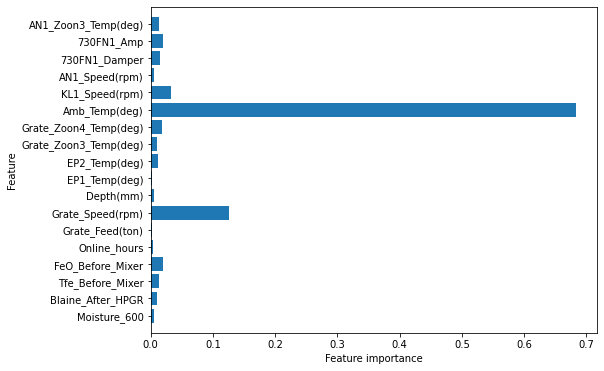

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

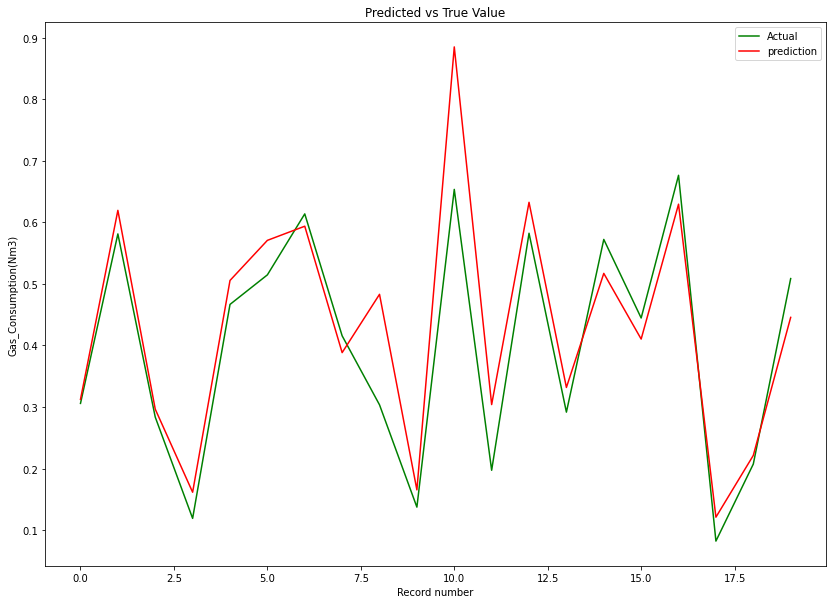

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Support Vector Regression

In [ ]:
model=SVR()
model.fit(X_train,y_train)

SVR()

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 87.32 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 87.32%
Mean Absolute Error 0.05
Mean Squared Error 0.00


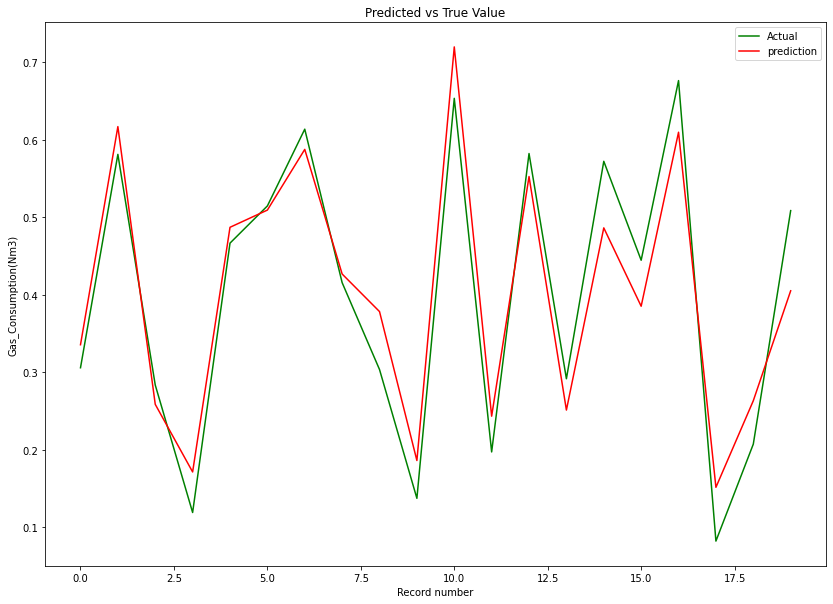

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# K-Nearest Neighbor Regressor

In [ ]:
model=KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 84.76 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 84.76%
Mean Absolute Error 0.05
Mean Squared Error 0.01


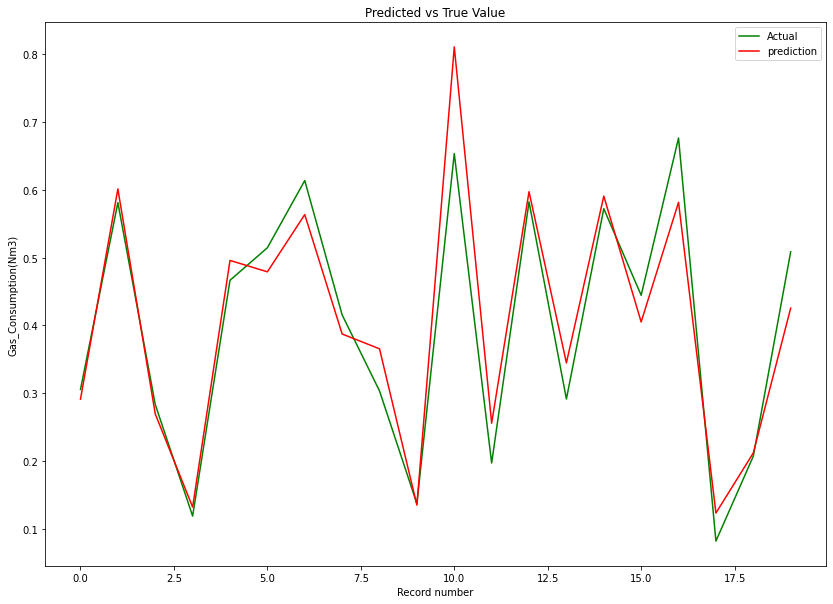

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Random Forest Regressor

In [ ]:
model = RandomForestRegressor(n_jobs = -1,random_state = 123)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=123)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 88.23 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 88.23%
Mean Absolute Error 0.05
Mean Squared Error 0.00


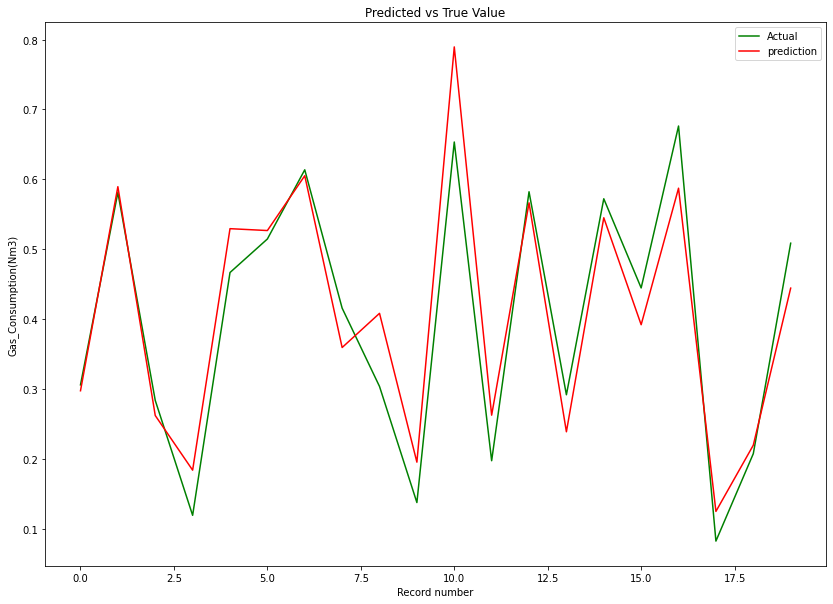

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

(-1.0, 18.0)

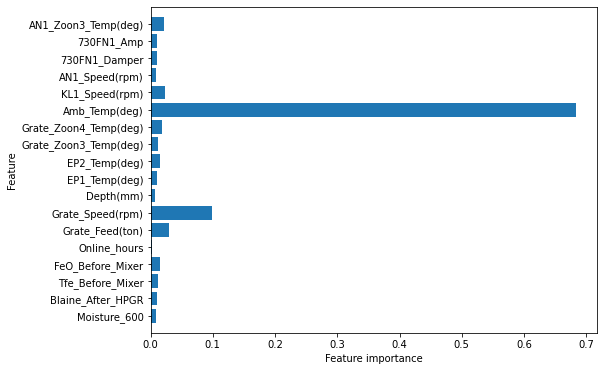

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Gradient Boosting Regressor

In [ ]:
model = GradientBoostingRegressor(random_state = 123)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 88.95 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 88.95%
Mean Absolute Error 0.05
Mean Squared Error 0.00


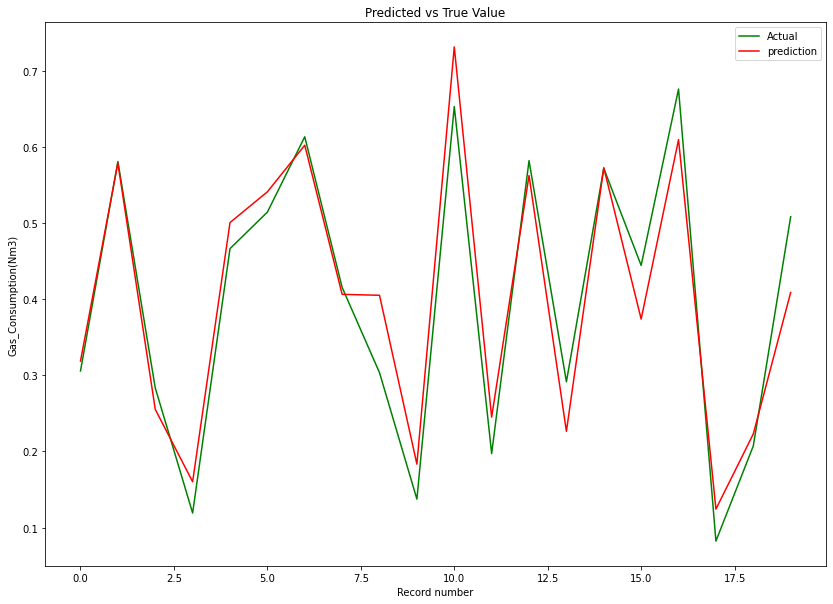

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

(-1.0, 18.0)

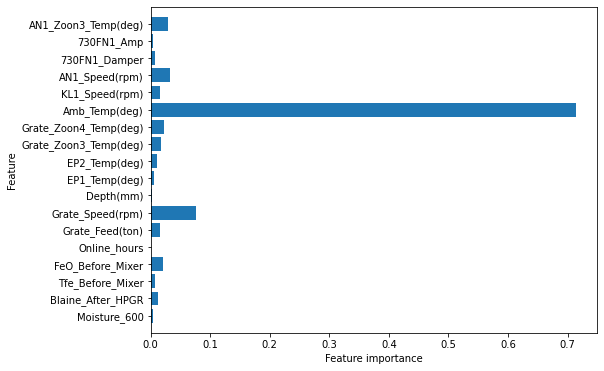

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Extreme Gradient Boosting Regressor

In [ ]:
model = XGBRegressor(random_state = 123,n_jobs=-1)
model.fit(X_train, y_train)

[10:37:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_jobs=-1, random_state=123)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 88.92 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 88.92%
Mean Absolute Error 0.05
Mean Squared Error 0.00


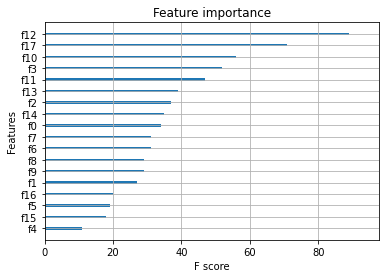

In [ ]:
xgb.plot_importance(model,importance_type="weight",show_values=False)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

(-1.0, 18.0)

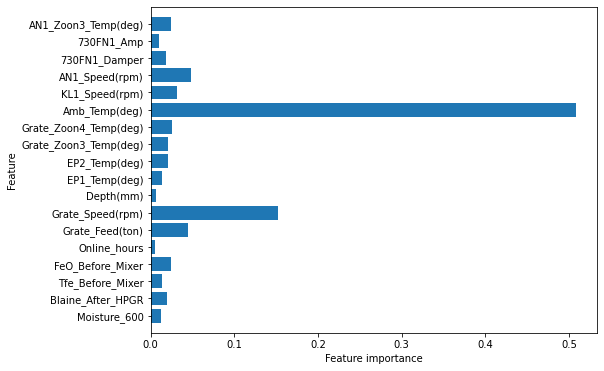

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

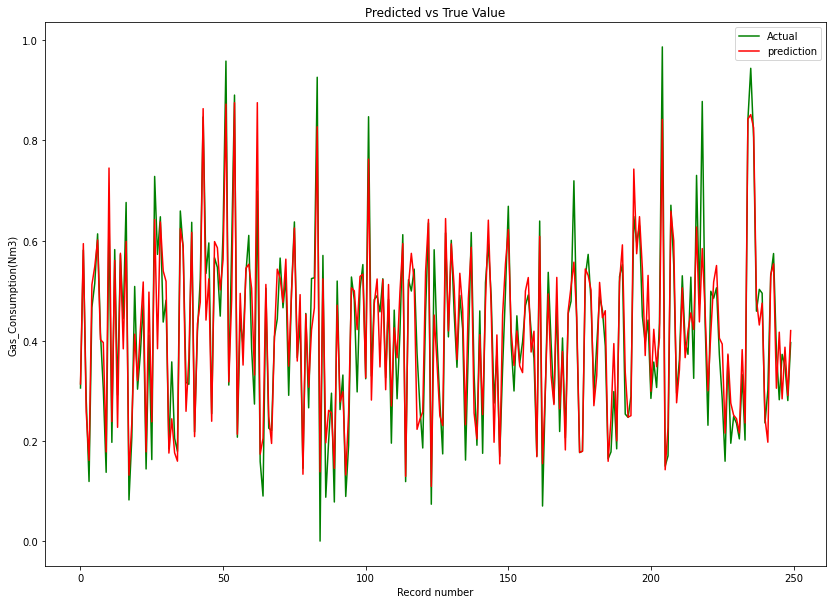

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(250),y_test[0:250], color = "green")
plt.plot(range(250),model.predict(X_test[0:250]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()